In [2]:
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np

In [3]:
labels = os.listdir('./../../Downloads/train')
labels

['lisa_simpson',
 'bart_simpson',
 'homer_simpson',
 'charles_montgomery_burns',
 'milhouse_van_houten',
 'marge_simpson',
 'moe_szyslak',
 'krusty_the_clown',
 'principal_skinner',
 'ned_flanders']

In [4]:
map = {'lisa_simpson' : 0,'bart_simpson' : 1,'homer_simpson': 2,'charles_montgomery_burns':3,'milhouse_van_houten':4,'marge_simpson':5,'moe_szyslak':6,'krusty_the_clown':7,'principal_skinner':8,'ned_flanders':9}
map

{'lisa_simpson': 0,
 'bart_simpson': 1,
 'homer_simpson': 2,
 'charles_montgomery_burns': 3,
 'milhouse_van_houten': 4,
 'marge_simpson': 5,
 'moe_szyslak': 6,
 'krusty_the_clown': 7,
 'principal_skinner': 8,
 'ned_flanders': 9}

In [5]:
import cv2
image_data = cv2.imread('./../../Downloads/train/lisa_simpson/pic_0005.jpg',cv2.IMREAD_GRAYSCALE)
image_data

array([[ 28,  27,  25,  26,  26,  27,  29,  24,  29,  23,  29,  24,  21,
         27,  26,  26,  27,  24,  30,  29,  26,  27,  27,  22,   1,   0,
          0,   0],
       [ 25,  25,  24,  24,  22,  22,  25,  24,  21,  23,  23,  23,  26,
         24,  26,  21,  24,  29,  24,  23,  25,  29,  23,  20,   1,   0,
          0,   0],
       [ 28,  26,  24,  27,  28,  27,  29,  27,  32,  27,  23,  26,  21,
         32,  27,  18,  26,  27,  23,  24,  29,  23,  23,  24,   1,   0,
          0,   0],
       [ 26,  24,  23,  24,  22,  20,  25,  27,  21,  23,  24,  22,  24,
         26,  31,  24,  19,  22,  23,  24,  22,  24,  24,  15,   1,   0,
          0,   0],
       [ 50,  36,  23,  23,  26,  26,  25,  19,  48,  29,  29,  18, 150,
        161,  81,  18,  29,  27,  27,  24,  23,  25,  20,  22,   1,   0,
          0,   0],
       [179, 177, 175, 176, 175, 175, 181, 182, 161, 162, 159, 170, 170,
        165, 159,  91, 103, 118, 113,  26,  28,  30,  28,  18,   1,   0,
          0,   0],
       [17

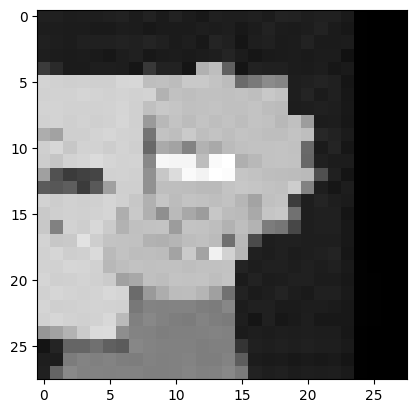

In [6]:
plt.imshow(image_data, cmap='gray')
plt.show()

In [7]:
def load_dataset(dataset,path):
    # Scan all the directories and create a list of labels
    labels=os.listdir(os.path.join(path, dataset))
    # Create lists for samples and labels
    X=[]
    y=[]
    # For each label folder
    for label in labels:
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            
            # Read the image
            image= cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)
            # And append it and a label to the lists
            X.append(image)
            y.append(map[label])
# Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y)

In [8]:
def create_data(path):
    X,y = load_dataset('train',path)
    X_test, y_test = load_dataset('test',path)
    return X,y,X_test,y_test

In [9]:
X,y,X_test,y_test = create_data('./../../Downloads')

In [10]:
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X=X[keys]
y=y[keys]

In [11]:
X.min(),X.max(),X_test.min(),X_test.max()

(0, 255, 0, 255)

In [12]:
y.shape

(8000,)

In [13]:
X = X.astype(np.float32) /255
X_test = X_test.astype(np.float32) /255

In [14]:
X.min(),X.max(),X.shape

(0.0, 1.0, (8000, 28, 28))

In [15]:
X = X.reshape(X.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
X.shape , X_test.shape

((8000, 784), (2000, 784))

In [ ]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, weight_regularizer_l1=0, weight_regularizer_l2=0,bias_regularizer_l1=0, bias_regularizer_l2=0):
        self.weights = 0.01*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.dot(inputs,self.weights) + self.biases

    def backward(self,dvalues):
        self.dweights = np.dot(self.inputs.T , dvalues)
        self.dbiases = np.sum(dvalues, axis=0 , keepdims=True)
        if self.weight_regularizer_l1>0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights<0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        if self.weight_regularizer_l2>0:
            self.dweights +=2* self.weight_regularizer_l2 * \self.weights
        if self.bias.regularizer_l1>0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases<0] = -1
            self.dbiases  = self.bias_regularizer_l1* dL1
        if self.bias_regularizer_l2>0:
            self.dbiases += 2* self.bias_regularizer_l2 *  b i f.biases
        self.dinputs = np.dot(dvalues, self.weights.T)

    def get_parameters(self):
        return self.weights, self.biases
    def set_parameters(self, weights, biases):
        self.weights = weights
        self.biases = biases

class Layer_Dropout:
    def __init__(self, rate):
        self.rate = 1 - rate
    def forward(self, inputs, training):
        self.inputs = inputs
        if not training:
            self.output = inputs.copy()
            return
        self.binary_mask = np.random.binomial(1,self.rate, size=inputs.shape) / self.rate
        self.output = inputs * self.binary_mask
    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask
    
        

class Layer_Input:
    def forward(self,inputs,training):
        self.output = inputs
    

class Activation_ReLU:
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.maximum(0,inputs)
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs<=0] = 0
    def predictions(self,outputs):
        return outputs

class Activation_Softmax:
    def forward(self, inputs, training):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims = True))
        probabilites = exp_values / np.sum(exp_values, axis=1, keepdims = True)
        self.output = probabilities

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1,1)
            jacobian_matrix = np.diagflat(single_output) - (np.dot(single_output, single_output.T))
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

    def predicitons(self, outputs):
        return np.argmax(outputs, axis=1)

class Loss:
    def regularization_loss(self):
        regularization_loss=0
        for layer in self.trainable_layers:
            
            # if layer.weight_regularizer_l1 > 0:
            #     regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs((layer.weights))
                                                                            
            # if layer.weight_regularizer_l2 > 0:
            #     regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
                
            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))
                
            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)

            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))
                
            if layer.bias_regularizer_l2 > 0:
                regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)



        return regularization_loss

    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers

    def calculate(self, output, y, *, include_regularization=False):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)

        if not include_regularization:
            return data_loss
        return data_loss, self.regularization_loss()


    def calculate_accumulated(self,*,include_regularization=False):
        data_loss = self.accumulated_sum / self.accumulated_count
        if not include_regulariztion:
            return data_loss
        return data_loss, self.regularization_loss()

    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0
        

class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, dacay=0,epsilon=1e-7,beta_1=0.9,beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. +self.decay * self.iterations))
    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weights_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1- self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1-self.beta_1)* layer.dbiases
        weight_momentums_corrected = layer.weight_momentums/(1-self.beta_1 ** (self.iterations +1))
        bias_momentums_corrected = layer.bias_momentums/(1-self.beta_1 ** (self.iterations +1))
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1-self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1-self.beta_2) * layer.dbiases**2
        weight_cache_corrected = layer.weight_cache / (1-self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1-self.beta_2 ** (self.iterations +1))
        layer.weights += -self.current_learning_rate * weight_momentums_corrected/(np.sqrt(weight_cache_corrected)+self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected/(np.sqrt(bias_cache_corrected)+self.epsilon)

    def post_update_params(self):
        self.iterations +=1

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred,1e-7,1-1e-7)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    def backward(self,dvalues,y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples


class Accuracy:
    def calculate(self,predictions,y):
        comparisions =  self.compare(predictions,y)
        accuracy = np.mean(comparisions)
        self.accumulated_sum += np.sum(comparisions)
        self.accumulated_count += len(comparisions)
        return accuracy
    def calculate_accumulated(self):
        accuracy = self.accumulated_sum / self.accumulated_count
        return accuracy
    def new_pass(self):
        self.accumualted_sum = 0
        self.accumulated_count = 0

class Accuracy_Categorical(Accuracy):
    def init(self,y):
        pass
    def compare(self,predicitions,y):
        if len(y.shape) == 2:
            y = np.argmax(y, axis=1)
        return predictions == y

class Activation_Softmax_Loss_CategoricalCrossentropy():
    def backward(self,dvalues,y_true):
        samples = len(dvalues)
        if len(y_true.shape)==2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples),y_true] -= 1
        self.dinputs = self.dinputs / samples

class Model:
    def __init__(self):
        self.layers = []
        self.softmax_classifier_output = None
    def add(self, Layer):
        self.layers.append(layer)
    def set(self, * , loss, optimizer, accuracy):
        self.loss = loss
        self.optimizer = optimizer
        self.accuracy =  accuracy
    def finalize(self):
        self.input_layer = Layer_Input()
        layer_count = len(self.layers)
        self.trainable_layers = []
        for i in range(layer_count):
            if i==0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]
            elif i< layer_count - 1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]
            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]
            if hasattr(self.layers[i] , 'weight'):
                self.trainable_layers.append(self.layers[i])
            self.loss.remember_trainable_layers(self.trainable_layers)
        if isinstance(self.layers[-1], Activation_Softmax) and isinstance(self.loss, Loss_CategoricalCrossentropy):
            self.softmax_classifier_output = Activation_Softmax_Loss_CategoricalCrossentropy()
    def train(self,X,y,*,epochs=1, batch_size=None,print_every=1,validation_data=None):
        self.accuracy.init(y)
        train_steps = 1
        if batch_size is not None:
            train_steps = len(X) // batch_size
            if train_steps * batch_size < len(X):
                train_steps +=1
        for epoch in range(1,epoch+1):
            print(f'epoch:{epoch}')
            self.loss.new_pass()
            self.accuracy.new_pass()
            for step in range(train_steps):
                if batch_size is None:
                    batch_X=X
                    batch_y =y
                else:
                    batch_X = X[step*batch_size:(step+1)*batch_size]
                    batch_y = y[step*batch_size:(step+1)*batch_size]
                output = self.forward(batch_X, training=True)
                data_loss, regularization_loss = self.loss.calculate(output,batch_y, include_regularization = True)
                loss = data_loss + regularization_loss
                predictions = self.output_layer_activation.prediction(output)
                accuracy = self.accuracy.calculate(predictions, batch_y)
                self.backward(output, batch_y)
                self.optimizer.pre_update_params()
                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)
                self.optimizer.post_update_params()
                if not step % print_every or step == train_steps - 1:
                    print(f'step: {step},' + f'acc: {accuracy:.3f},' + f'loss: {loss:.3f},(' + f'data_loss: {data_loss: .3f},' + f'reg_loss: {regularization_loss:.3f}),' + f'lr: {self.optimizer.current_learning_rate}')
            epoch_data_loss, epoch_regularization_loss = self.loss.calculate_accumulated(include_regularizaiton=True)
            epoch_loss = epoch_data_loss + epoch_regularization_loss
            epoch_accuracy = self.accuracy.calculate_accumulated()
            print(f'training,' + f'acc: {epoch_accuracy:.3f},' + f'loss: {epoch_loss:.3f},(' + f'data_loss: {epoch_data_loss: .3f},' + f'reg_loss: {epoch_regularization_loss:.3f}),' + f'lr: {self.optimizer.current_learning_rate}')
            if validation_data is not None:
                self.evaluate(*validation_data, batch_size = batch_size)
            
    def evaluate(self, X_val,y_val,*,batch_size=None):
        validation_steps = 1
        if batch_size is not None:
            validation_steps = len(X_val) // batch_size
            if validation_steps * batch_size < len(X_val):
                validation_steps += 1
        self.loss.new_pass()
        self.accuracy.new_pass()
        for step in range(validation_steps):
            if batch_size is None:
                batch_X = X_val
                batch_y = y_val
            else:
                batch_X = X_val[step*batch_size:(step-1)*batch_size]
                batch_y = y_val[step*batch_size:(step-1)*batch_size]
            output = self.forward(batch_X, training=False)
            self.loss.calculate(output,batch_y)
            predictions = self.output_layer_activation.predicitons(output)
            self.accuracy.calculate(predictions, batch_y)
        validation_loss = self.loss.calculate_accumulated()
        validation_accuracy = self.accuracy.calculate_accumulated()
        print(f'validation,' + f'acc: {validation_accuracy: .3f},' + f'loss:{validation_loss:3f}')
    def predict(self,X,*,batch_size=None):
        prediction_steps = 1
        if batch_size is not None:
            prediction_steps = len(X) // batch_size
            if prediciton_steps * batch_size < len(X):
                prediction_steps += 1
        output = []
        for step in range(prediction_steps):
            if batch_size is None:
                batch_X = X
            else:
                batch_X = X[step*batch_size:(step+1)*batch_size]
            batch_output = self.forward(batch_X, training=False)
            output.append(batch_output)
        return np.vstack(output)
    def forward(self,X,training):
        self.input_layer.forward(X,training)
        for layer in self.layers:
            layer.forward(layer.prev.output, training)
        return layer.output
    def backward(self,output,y):
        if self.softmax_classifier_output is not None:
            self.softmax_classifier_output.backward(output,y)
            self.layers[-1],dinputs = self.softmax_classifier_output.dinputs
            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)
            return

        self.loss.backward(output,y)
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)

model = Model()
model.add(Layer_Dense(X.shape[1],128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128,128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128,10))
model.add(Activation_Softmax())
model.set(Loss = Loss_CategoricalCrossentropy(),optimizer=Optimizer_Adam(decay=1e-4),accuracy=Accuracy_Categorical())
model.finalize()
model.train(X,y,validation_data=(X_test,y_test),epochs=10,batch_size=128,print_every=100)

In [16]:
model = Model()
model.add(Layer_Dense(X.shape[1],128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128,128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128,10))
model.add(Activation_Softmax())
model.set(Loss = Loss_CategoricalCrossentropy(),optimizer=Optimizer_Adam(decay=1e-4),accuracy=Accuracy_Categorical())
model.finalize()
model.train(X,y,validation_data=(X_test,y_test),epochs=10,batch_size=128,print_every=100)

NameError: name 'Model' is not defined